In [1]:
# Dependencies and Setup
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime, timedelta
from datetime import date as dt
from pandas.plotting import table

In [4]:
# From the SQLAlchemy library, import specific modules
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import desc

# Reflect Tables into SQLAlchemy ORM

In [5]:
# More direct and inflexible method to create an engine (opens the 'door' into memory)
engine = create_engine("sqlite:///data/hawaii.sqlite")

In [6]:
# Reflect the tables into classes using automap_base()
Base = automap_base()
# Reflect the tables with Base.prepare(), passing in the engine and reflect=True
Base.prepare(engine, reflect = True)

In [7]:
# Create a Session object (the thing that keeps track on what I am doing)
session = Session(bind=engine)

In [8]:
# We can view all of the classes that automap with .keys()
Base.classes.keys()

['measurement', 'station']

In [9]:
# Create a variable for each Classes (!Dataframes and Series = Classes need to be proper case)
HawaiiMeasurement = Base.classes.measurement
HawaiiStation = Base.classes.station

# Exploratory Climate Analysis

### Design a query to retrieve the last 12 months of precipitation data

In [10]:
# Find and calculate the range of data from the last 12 months of precipitation
last_data_point = (session
                  .query(HawaiiMeasurement.date)
                  .order_by(HawaiiMeasurement.date.desc())
                   .all())[0]
last_data_point

('2017-08-23')

In [11]:
# Format it as a string not a tuple
date_from_last_year = dt.fromisoformat('2017-08-23') #HawaiiMeasurement[-1]
date_from_last_year.strftime("%Y-%m-%d")

'2017-08-23'

In [12]:
# Use datetime.timedelta() function to calculate the difference of one year
last_year = date_from_last_year - timedelta(days = 365)
last_year.strftime("%Y-%m-%d")

'2016-08-23'

In [13]:
# Use session.query() to retrieve the date and prcp columns, .filter() by the date you calculated above, and selecting .all() results
one_year_prcp = (session
                .query(HawaiiMeasurement.date
                       , HawaiiMeasurement.prcp)
                .filter(HawaiiMeasurement.date >= last_year)
                .all())
one_year_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [14]:
# # Convert list to a dictionary
# def Convert(one_year_prcp):
#     res_dct = {one_year_prcp[i]: one_year_prcp[i + 1] for i in range(0, len(one_year_prcp), 2)}
#     return res_dct

In [15]:
# Save the query results as a Pandas DataFrame() 
past_year_prcp = pd.DataFrame(one_year_prcp, columns=['Date','Precipitation'])
past_year_prcp.sort_values('Date', axis=0)

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


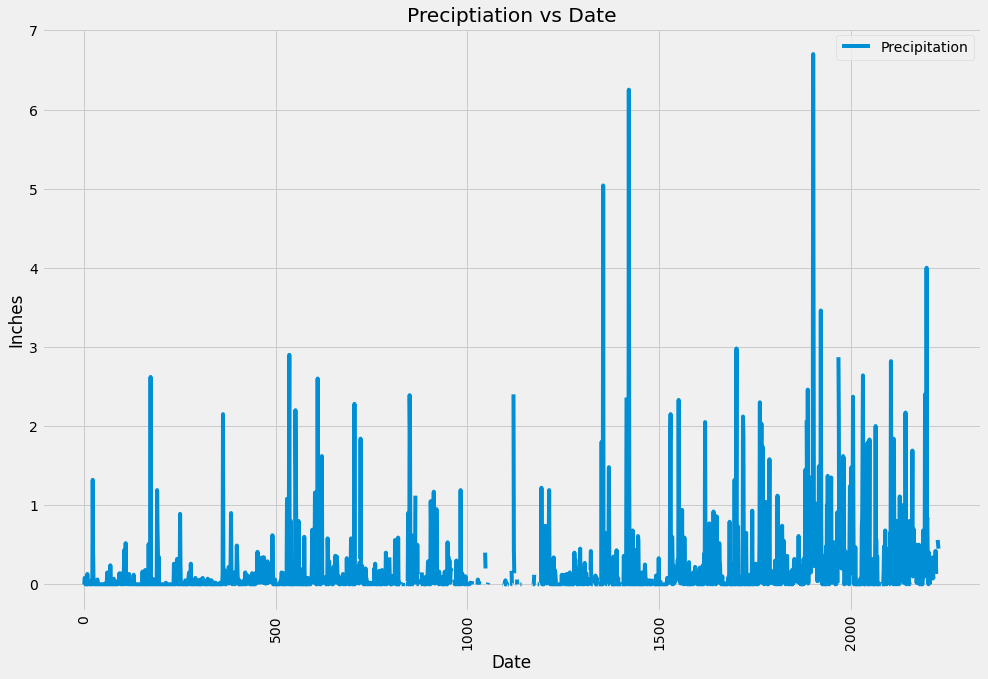

<Figure size 432x288 with 0 Axes>

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
bar_chart = past_year_prcp.plot(rot=90, figsize= (15,10))
plt.title("Preciptiation vs Date")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()
plt.savefig("precipitationvsdate.png")

## Query station information

In [21]:
# Total number of stations
total_number_of_stations = (session.query(func.count(HawaiiStation.station)).all())
total_number_of_stations

[(9)]

In [22]:
# list the stations and ovservation counts in descending order
# desc_expression = sqlalchemy.sql.expression.desc()
# order_by_query = query.order_by(desc_expression)
# session.query(func.count(Station.station)).all()
list_of_stations = list(session
                    .query(HawaiiMeasurement.station, func.count(HawaiiMeasurement.station))
                    .group_by(HawaiiMeasurement.station)
                    .order_by(func.count(HawaiiMeasurement.station).desc())
                    .all())
list_of_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# most active station is ... 
list_of_stations[0]

('USC00519281', 2772)

In [24]:
# which stations has the highest number of observations use: func.min, func.max, func.avg, and func.count
min_of_stations = (session
                    .query(HawaiiMeasurement.station,
                        func.min(HawaiiMeasurement.tobs))
                    .all())
min_of_stations

[('USC00511918', 53.0)]

In [25]:
# maximum number of stations
max_of_stations = (session
                    .query(HawaiiMeasurement.station,
                        func.max(HawaiiMeasurement.tobs))
                    .all())
max_of_stations

[('USC00519397', 87.0)]

In [26]:
# average number of stations
avg_of_stations = (session
                    .query(HawaiiMeasurement.station,
                        func.avg(HawaiiMeasurement.tobs))
                    .all())
avg_of_stations

[('USC00519397', 73.09795396419437)]

In [27]:
# but for the most active station it is:
active_stat = (session
                    .query(HawaiiMeasurement.station,
                        func.avg(HawaiiMeasurement.tobs)
                          , func.max(HawaiiMeasurement.tobs)
                          , func.min(HawaiiMeasurement.tobs))
                   .filter(HawaiiMeasurement.station == 'USC00519281')
                    .all())
active_stat

[('USC00519281', 71.66378066378067, 85.0, 54.0)]

In [28]:
# Retrieve USC00519281 station in the last 12 months 
highest_tob = (session
               .query(HawaiiMeasurement.date
                      , HawaiiMeasurement.station
                      , HawaiiMeasurement.tobs)
               .filter(HawaiiMeasurement.station == 'USC00519281')
               .filter(HawaiiMeasurement.date >= last_year)
               .all())
highest_tob

[('2016-08-23', 'USC00519281', 77.0),
 ('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-26', 'USC00519281', 80.0),
 ('2016-08-27', 'USC00519281', 75.0),
 ('2016-08-28', 'USC00519281', 73.0),
 ('2016-08-29', 'USC00519281', 78.0),
 ('2016-08-30', 'USC00519281', 77.0),
 ('2016-08-31', 'USC00519281', 78.0),
 ('2016-09-01', 'USC00519281', 80.0),
 ('2016-09-02', 'USC00519281', 80.0),
 ('2016-09-03', 'USC00519281', 78.0),
 ('2016-09-04', 'USC00519281', 78.0),
 ('2016-09-05', 'USC00519281', 78.0),
 ('2016-09-06', 'USC00519281', 73.0),
 ('2016-09-07', 'USC00519281', 74.0),
 ('2016-09-08', 'USC00519281', 80.0),
 ('2016-09-09', 'USC00519281', 79.0),
 ('2016-09-10', 'USC00519281', 77.0),
 ('2016-09-11', 'USC00519281', 80.0),
 ('2016-09-12', 'USC00519281', 76.0),
 ('2016-09-13', 'USC00519281', 79.0),
 ('2016-09-14', 'USC00519281', 75.0),
 ('2016-09-15', 'USC00519281', 79.0),
 ('2016-09-16', 'USC00519281', 78.0),
 ('2016-09-17', 'USC00519281', 79.0),
 ('2016-09-1

In [29]:
highest_tob_df = pd.DataFrame(highest_tob)
revise_highest_tob_df = highest_tob_df[['date', 'tobs']]
revise_highest_tob_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


In [30]:
# Plot the highest tobs (temperature) from only last year
# list_of_stations[0] = ('USC00519281', 2772) the highest tob
plot_htobs = session.query(HawaiiMeasurement.tobs).filter(HawaiiMeasurement.station == 'USC00519281').filter(HawaiiMeasurement.date >= last_year).all()
plot_htobs_df = pd.DataFrame(plot_htobs, columns=['tobs'])
plot_htobs_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


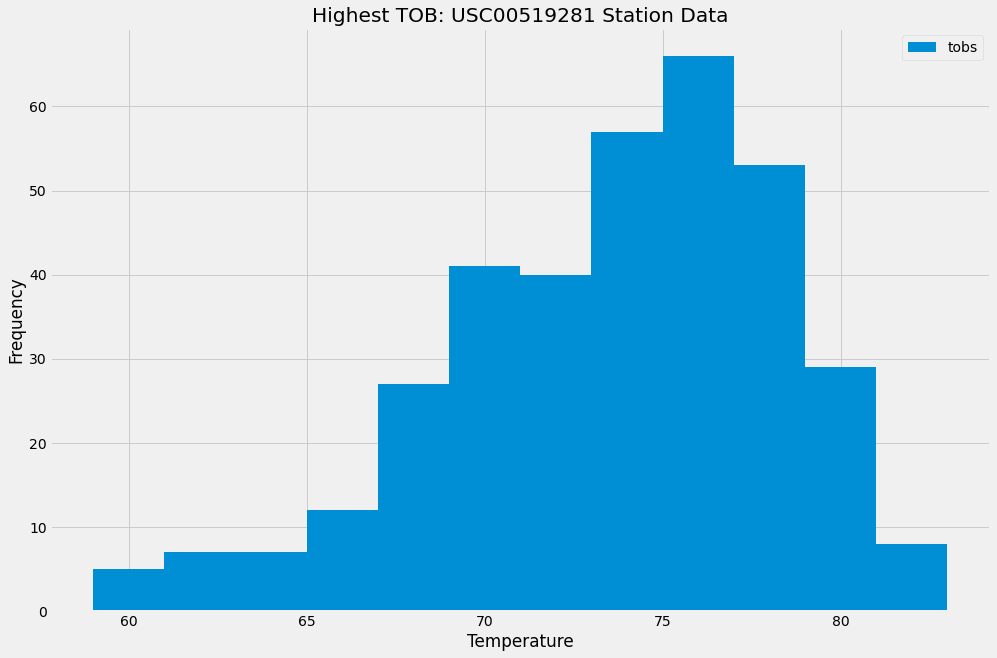

In [31]:
# Plot it in a histogram with 12 bins
plot_htobs_df.plot.hist(bins=12, figsize= (15,10))
plt.title("Highest TOB: USC00519281 Station Data")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig("highesttobstattemp.png")

### Creating Start and End 

In [35]:
# Create a session
session = Session(engine) 

In [36]:
# @app.route("/api/v1.0/temp/<start>")
# @app.route("/api/v1.0/temp/<start>/<end>")
def summary(start=None, end=None):
    # Create a session
    session = Session(engine) 

    #  Given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.
    if not end: 
        dates_greater = (session
                .query(func.min(HawaiiMeasurement.tobs)
                , func.avg(HawaiiMeasurement.tobs)
                , func.max(HawaiiMeasurement.tobs))
                .filter(HawaiiMeasurement.date >= start)
                .all())
        return jsonify(summary=dates_greater)

    dates_greater = (session
                .query(func.min(HawaiiMeasurement.tobs)
                , func.avg(HawaiiMeasurement.tobs)
                , func.max(HawaiiMeasurement.tobs))
                .filter(HawaiiMeasurement.date >= start)
                .filter(HawaiiMeasurement.date <= end)
                .all())
    session.close()
    return jsonify(summary=dates_greater)